In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats, norm, shapiro

#### Part A

In [76]:
# Import the data
path = "HASU Historical Data(2).csv"
data = pd.read_csv(path)

time_index = np.arange(0, len(data["Price"]))
time_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#### Part B and Part C

In [77]:
# Calculating the log returns. First row having the NaN log return is dropped.
log_returns = np.log(data["Price"] / data["Price"].shift(1)).dropna()
print(log_returns)

1      0.024541
2      0.000000
3      0.000000
4      0.058841
5      0.002853
         ...   
493    0.012142
494   -0.003454
495    0.003454
496    0.001723
497    0.001720
Name: Price, Length: 497, dtype: float64


In [78]:
# Estimating the mean and variance of log returns
mu = log_returns.mean()
variance = log_returns.var()
print(f"Mean = {mu}, Variance = {variance}")

Mean = 0.0011909837066137467, Variance = 0.0005467189389938379


In [79]:
# Drift Parameter and Scale Parameter
mu_gb = mu + variance/2
sigma = variance**(1/2)
print(f"Drift Parameter (mu_gb): {mu_gb}")
print(f"Scale Parameter (sigma): {sigma}")

Drift Parameter (mu_gb): 0.0014643431761106657
Scale Parameter (sigma): 0.02338202170458829


#### Part D

###### Ho - Log returns are normally distributed (Null Hypothesis)
###### Ha - Log returns are **not** normally distributed

In [80]:
stat, p = shapiro(log_returns)
print("Statistics = %.3f, p = %.3f" %(stat, p))

Statistics = 0.964, p = 0.000


In [81]:
alpha = 0.05 # Significance level
if p > alpha:
    print("Fail to reject Null Hypothesis")
else:
    print("Reject Null hypothesis")

Reject Null hypothesis


###### The dataset is not normally distributed.
###### Therefore it is not appropiate to model the closing price of HASU using Geometric Brownian Motion.

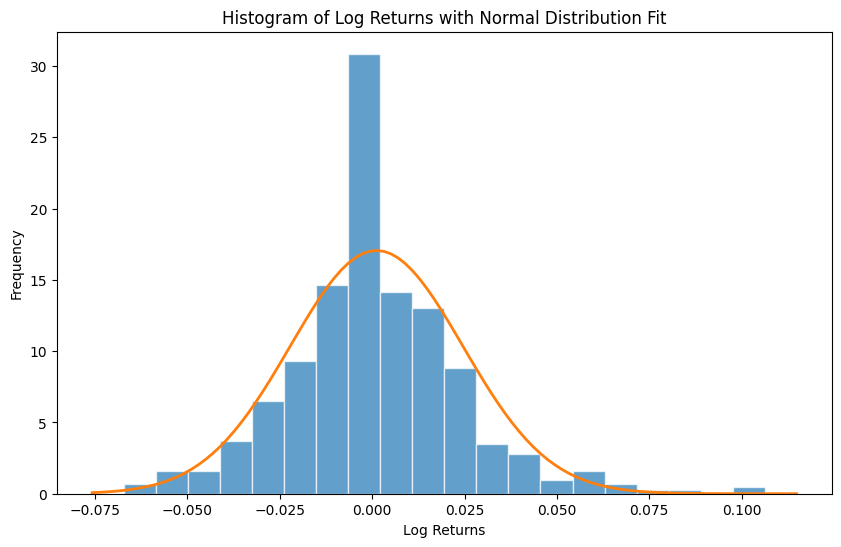

In [82]:
# Histogram of log returns with a normal distribution fit
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=20, alpha=0.7, edgecolor="white", density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, log_returns.mean(), log_returns.std())
plt.plot(x, p, linewidth=2)
plt.title("Histogram of Log Returns with Normal Distribution Fit")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.show()

#### Part E

In [89]:
# BrownianG Function
def BrownianG(m, N, dt, sigma, mu, w0, GB):
    x = np.zeros((m, N+1))
    x[:, 0] = w0
    x0 = x[:, 0]

    if not GB:
        r = norm.rvs(size = x0.shape + (N,), loc = mu * dt, scale = sigma * np.sqrt(dt))
        np.cumsum(r, axis = 1, out = x[:, 1:])
        x[:, 1:] += w0
    else:
        r = norm.rvs(size = x0.shape + (N,), loc = mu * dt, scale = sigma * np.sqrt(dt))
        np.cumsum(r, axis = 1, out = x[:, 1:])
        if w0 != 0:
            x[:, 1:] = w0 * np.exp(x[:, 1:])
        else:
            x[:, 1:] = np.exp(x[:, 1:])
    return x

In [90]:
# Data
N_simulations = 5000 # Number of simulations
N_days = 20 # Number of days
dt = 1 # Time Step
last_price = data["Price"].iloc[-1]

# Simulation for 5000 sample paths
paths = BrownianG(N_simulations, N_days, dt, sigma, mu, last_price, True)
paths_df = pd.DataFrame(paths.T) 
print(paths_df)

         0          1          2          3          4          5     \
0   58.200000  58.200000  58.200000  58.200000  58.200000  58.200000   
1   57.607031  57.206185  57.362372  58.322949  58.124599  60.351604   
2   57.468225  58.149288  58.621655  56.342379  60.732346  58.215306   
3   61.740722  57.868418  58.020186  56.646578  61.809443  58.081828   
4   61.673348  58.925297  60.629186  55.037989  63.584367  59.082863   
5   62.120011  59.866246  61.843531  54.318284  66.526460  57.352981   
6   61.525317  59.532606  62.178207  54.555587  67.391613  56.698756   
7   63.000299  60.626250  60.977212  56.730359  67.991682  55.209936   
8   64.906131  61.775173  61.975231  57.144143  68.059630  53.474460   
9   66.625598  60.216458  61.920673  56.999615  68.939611  54.909176   
10  68.306864  59.507716  60.719490  56.939058  68.016289  54.091996   
11  67.995113  60.484358  60.823095  58.406056  67.949824  54.412053   
12  66.259012  59.074978  59.802984  59.238662  70.206605  53.69

#### Part F

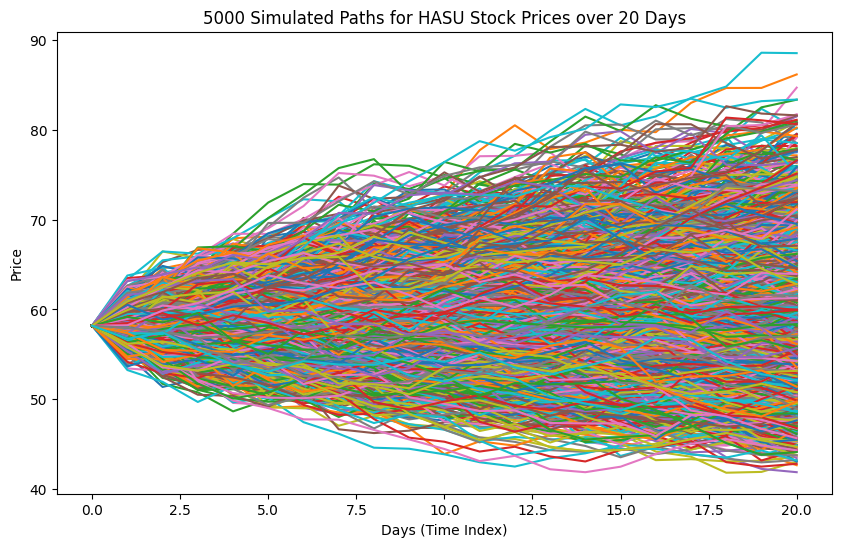

In [85]:
# Plotting the sample paths
plt.figure(figsize=(10, 6))
plt.plot(paths_df)
plt.title("5000 Simulated Paths for HASU Stock Prices over 20 Days")
plt.xlabel("Days (Time Index)")
plt.ylabel("Price")
plt.show()

#### Part G

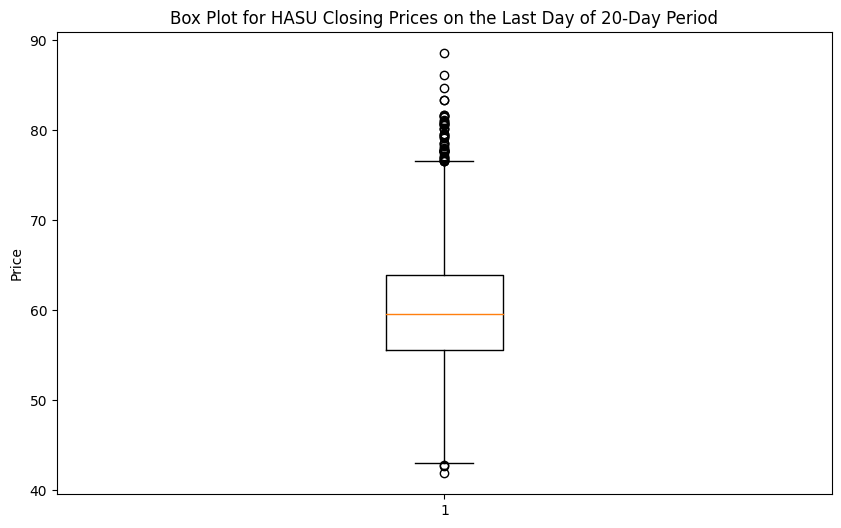

In [86]:
# Box Plot for the CLosing Price on the Last Day
last_day_prices = paths_df.iloc[-1]

plt.figure(figsize=(10, 6))
plt.boxplot(last_day_prices)
plt.title("Box Plot for HASU Closing Prices on the Last Day of 20-Day Period")
plt.ylabel("Price")
plt.show()

#### Part H

In [87]:
prob = ((last_day_prices >= 55) & (last_day_prices <= 60)).mean()
print(f"Probablity that the closing price is between 55 and 60 = {prob}")

Probablity that the closing price is between 55 and 60 = 0.3102


#### Part I

In [88]:
prediction = np.percentile(last_day_prices, [2.5, 97.5])
print(f"95% prediction interval: {prediction}")

95% prediction interval: [48.48818084 73.61472014]
